In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan approval/loan_prediction.csv')
df.head().T



,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [14]:
df.drop('Loan_ID', axis=1, inplace=True)
df.isnull().sum()


,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [16]:
num_attribs = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
cat_attribs = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term', 'Property_Area']


In [17]:
for col in df[cat_attribs]:
  df[col] = df[col].fillna(df[col].mode()[0])

df[cat_attribs].isnull().sum()


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Credit_History,0
Loan_Amount_Term,0
Property_Area,0


In [18]:
# Fill missing values in categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

<ipython-input-18-b8ce96aa13be>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-18-b8ce96aa13be>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [19]:
# Fill missing values in LoanAmount with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# Fill missing values in Credit_History with the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

<ipython-input-19-8583e9d503d6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
<ipython-input-19-8583e9d503d6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [20]:
import plotly.express as px

loan_status_count = df['Loan_Status'].value_counts()
fig_loan_status = px.pie(loan_status_count,
                         names=loan_status_count.index,
                         title='Loan Approval Status')
fig_loan_status.show()

In [21]:
gender_count = df['Gender'].value_counts()
fig_gender = px.bar(gender_count,
                    x=gender_count.index,
                    y=gender_count.values,
                    title='Gender Distribution')
fig_gender.show()

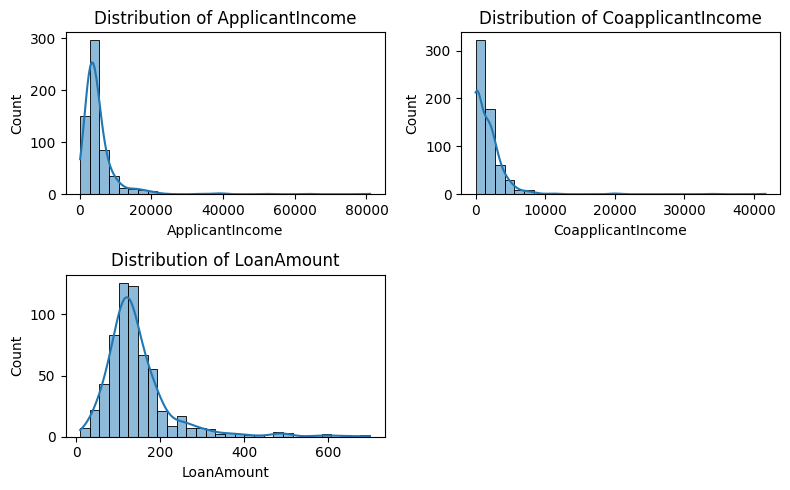

In [22]:
# plotting distributions of numerical features
plt.figure(figsize=(8, 5))
for i, column in enumerate(num_attribs, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

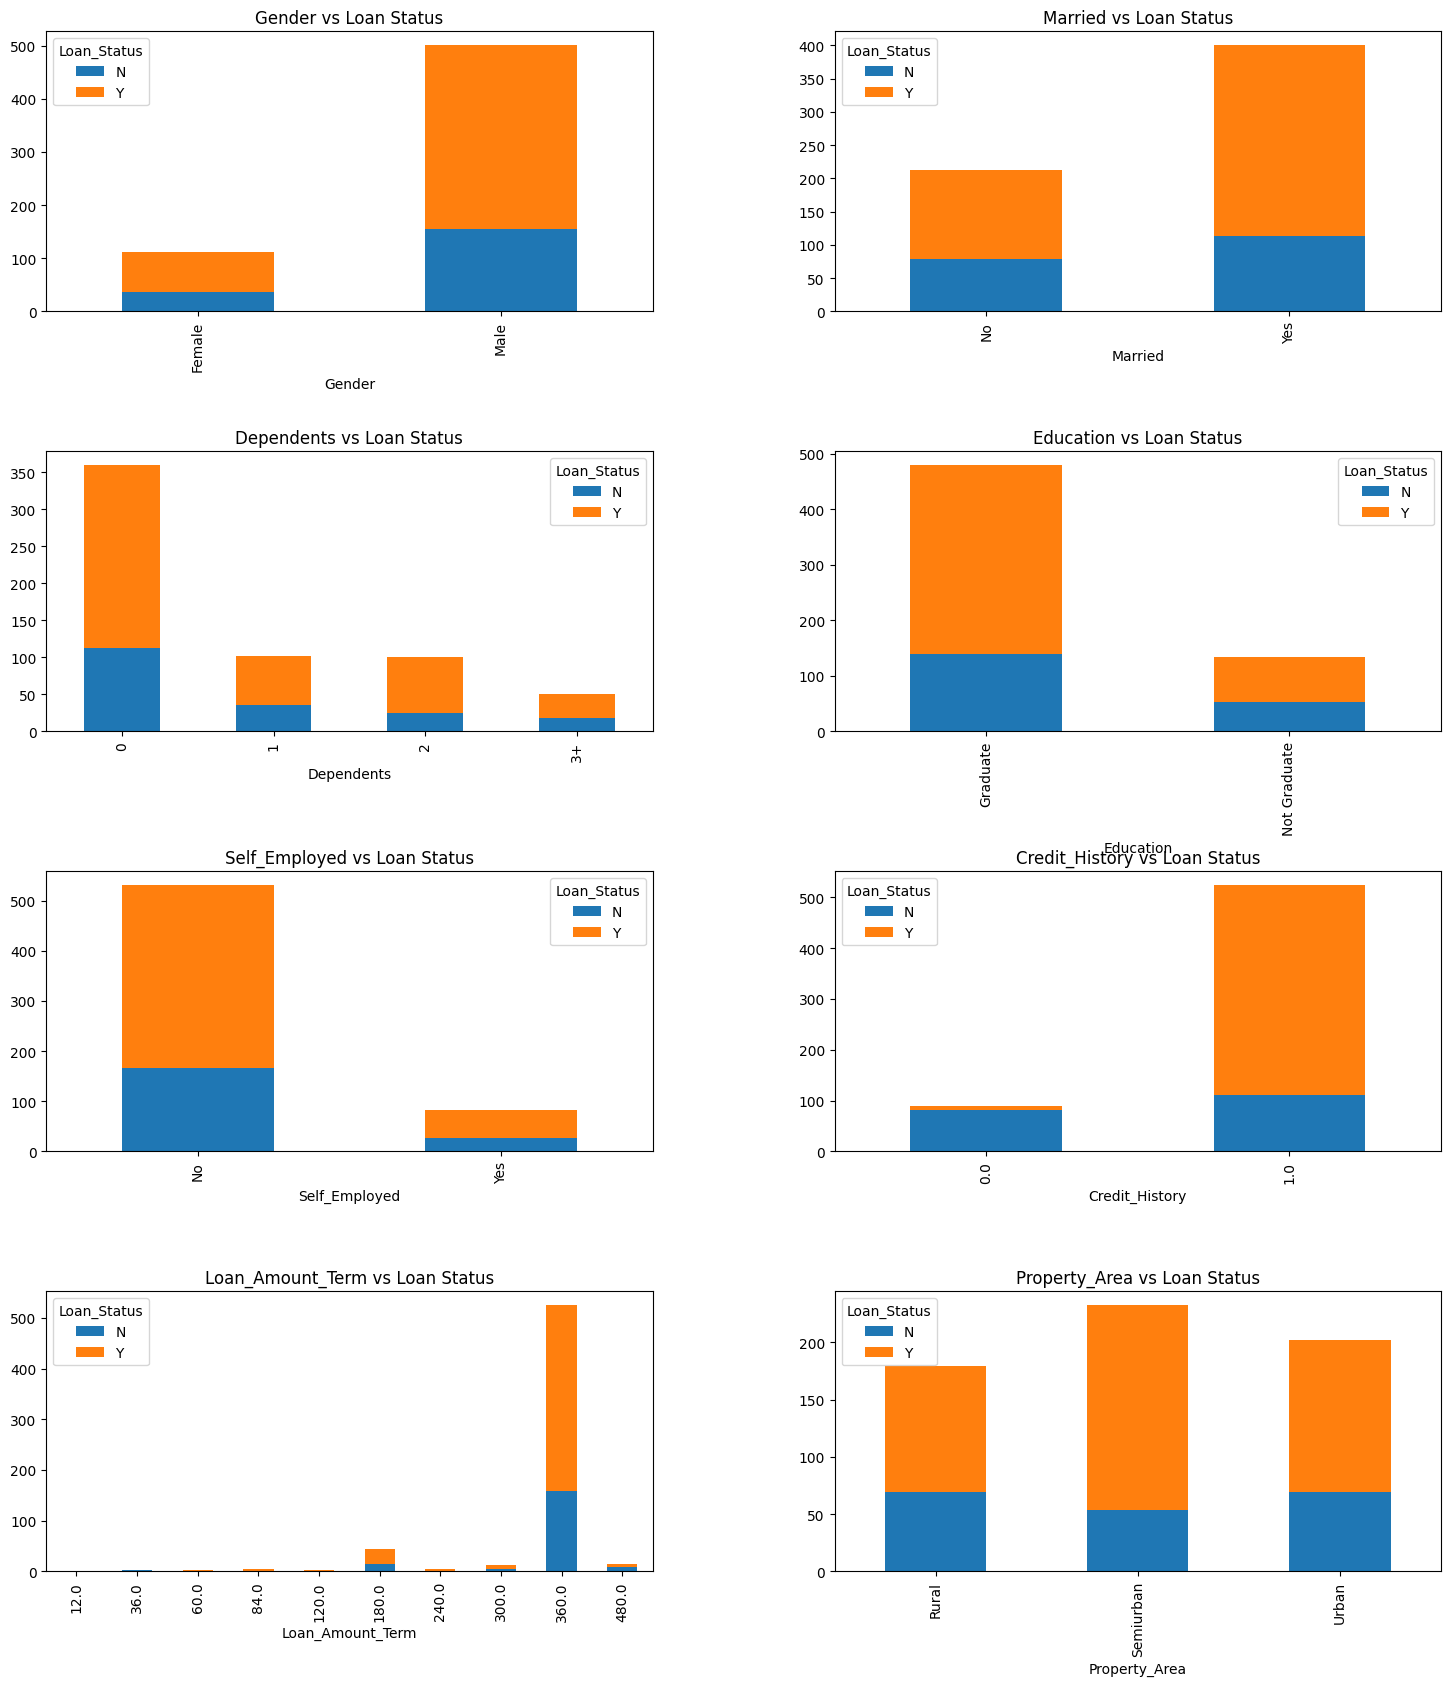

In [23]:
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)


axes = axes.flatten()  # Flatten the axes array to iterate easily

for i, col in enumerate(cat_attribs):
    cross_tab = pd.crosstab(df[col], df['Loan_Status'])
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i])  # Plot on the specific subplot
    axes[i].set_title(f'{col} vs Loan Status')


In [24]:
for col in df[cat_attribs]:
    print(df[col].value_counts().head(10))
    print('Unique values:', df[col].nunique(dropna=False), '\n')

Gender
Male      502
Female    112
Name: count, dtype: int64
Unique values: 2 

Married
Yes    401
No     213
Name: count, dtype: int64
Unique values: 2 

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Unique values: 4 

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Unique values: 2 

Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Unique values: 2 

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64
Unique values: 2 

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Unique values: 10 

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Unique values: 3 



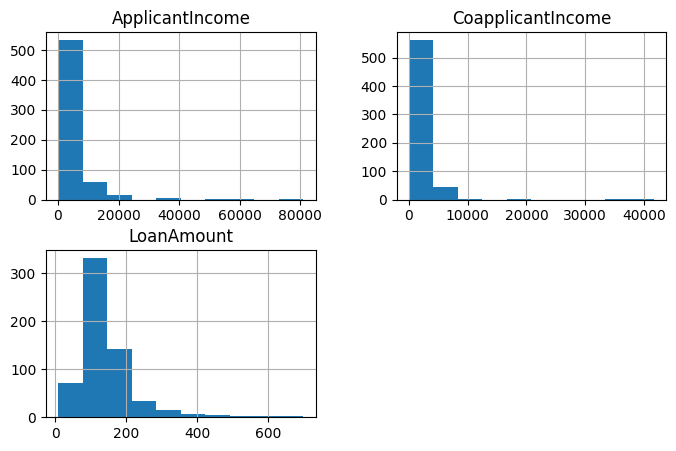

In [25]:
df[num_attribs].hist(figsize=(8,5))
plt.show()

In [26]:
fig_income = px.box(df,
                    x='ApplicantIncome',
                    y='Loan_Status',
                    color="Loan_Status",
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [27]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

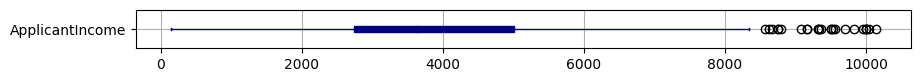

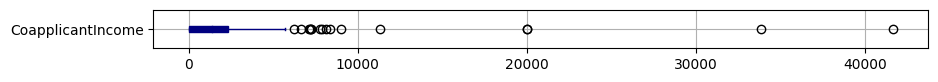

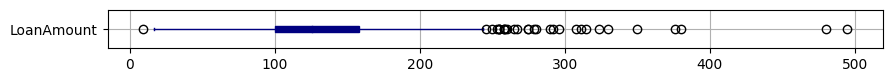

In [28]:
# Check for outliers among numeric variables
for feature in num_attribs:
    plt.figure(figsize=(10, 0.5))
    df.boxplot(column=feature, vert=False, patch_artist=True, color='navy')
    plt.show()

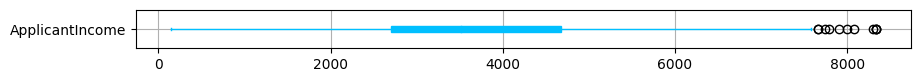

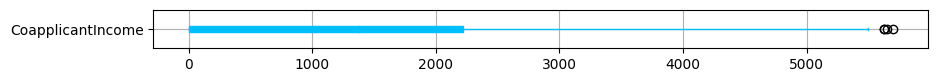

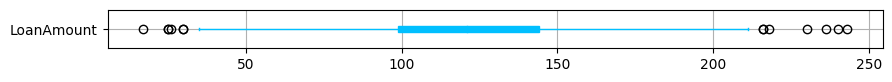

In [29]:
# Optional code for eliminating outliers

Q1 = df[num_attribs].quantile(0.25)
Q3 = df[num_attribs].quantile(0.75)
IQR = Q3 - Q1

# Identify and drop rows with values outside the IQR
outlier_indices_iqr = ((df[num_attribs] < (Q1 - 1.5 * IQR)) | (df[num_attribs] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[~outlier_indices_iqr]

# print("Numeric Distributions: Outliers Removed")
for feature in num_attribs:
     plt.figure(figsize=(10, 0.5))
     df.boxplot(column=feature, vert=False, patch_artist=True, color = '#00BFFF')
     plt.show()

In [30]:
fig_property_area = px.histogram(df, x='Property_Area', color='Loan_Status',
                                 barmode='group',
                                title='Loan_Status vs Property_Area')
fig_property_area.show()

In [31]:
# Convert categorical columns to numerical using one-hot encoding
df1 = pd.get_dummies(df, columns=cat_attribs)

# Split the dataset into features (X) and target (y)
X = df1.drop('Loan_Status', axis=1)
y = df1['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
X_train[num_attribs] = scaler.fit_transform(X_train[num_attribs])
X_test[num_attribs] = scaler.transform(X_test[num_attribs])

from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [32]:
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y']


In [33]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Gender_Female  \
213         1.309639          -0.974108    0.188144          False   
330         0.413199           0.313307   -0.140576          False   
595         0.038719          -0.974108   -0.317579          False   
82         -1.629788           0.376493    1.123731           True   
548         0.831855          -0.974108   -0.494582           True   

     Gender_Male  Married_No  Married_Yes  Dependents_0  Dependents_1  \
213         True       False         True         False         False   
330         True        True        False         False          True   
595         True        True        False          True         False   
82         False       False         True         False         False   
548        False        True        False          True         False   

     Dependents_2  ...  Loan_Amount_Term_120.0  Loan_Amount_Term_180.0  \
213         False  ...                   False                   F

In [34]:
from sklearn.metrics import classification_report, accuracy_score

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       1.00      0.53      0.70        30
           Y       0.84      1.00      0.91        72

    accuracy                           0.86       102
   macro avg       0.92      0.77      0.80       102
weighted avg       0.89      0.86      0.85       102

